In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
pd.options.display.max_columns = None # to see all the columns

In [2]:
url_1 = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/companies_data_world.csv"
df = pd.read_csv(url_1, encoding='ISO-8859-1')
df.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network Media,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


In [3]:
df["status"].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

# Data cleaning

In [4]:
df1 = df[df["status"] != "operating"]
df1["status"]= df1["status"].apply(lambda x: x.replace("ipo","success"))
df1["status"]= df1["status"].apply(lambda x: x.replace("acquired","success"))
df1["status"]= df1["status"].apply(lambda x: x.replace("closed","failure"))
df1["status"].value_counts()

<ipython-input-4-04c390efec36>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-04c390efec36>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-04c390efec36>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



success    7096
failure    6238
Name: status, dtype: int64

In [5]:
df1.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15


In [6]:
# Basic stats
print("Number of rows : {}".format(df1.shape[0]))
print()


print("Basics statistics: ")
df1_desc = df1.describe(include='all')
display(df1_desc)
print()

print("Percentage of missing values: ")
display((100*df1.isnull().sum()/df1.shape[0]).sort_values(ascending=False))

Number of rows : 13334

Basics statistics: 


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
count,13334,13333,12117,12248,13334,13334,11343,11125,11182,11182,13334.000000,9602,13332,13334
unique,13334,13325,12100,5747,4587,2,84,209,595,1711,NaN,1638,3789,3666
top,/organization/1-mainstream,SpaceConnect,http://app.thotz.co/,Software,-,success,USA,CA,SF Bay Area,San Francisco,NaN,2007-01-01,2008-01-01,2008-01-01
freq,1,2,2,917,2191,7096,8172,3402,2498,855,NaN,342,171,130
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.859832,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.515366,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN



Percentage of missing values: 


founded_at           27.988601
state_code           16.566672
region               16.139193
city                 16.139193
country_code         14.931753
homepage_url          9.127044
category_list         8.144593
first_funding_at      0.014999
name                  0.007500
permalink             0.000000
funding_total_usd     0.000000
status                0.000000
funding_rounds        0.000000
last_funding_at       0.000000
dtype: float64

# Featured Engineering

### Consider 2 status : success et failure

In [7]:
df1.insert(4, 'market', (df1['category_list'].str.split('|').str.get(0)))
df1.head(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15


In [8]:
# grouping markets in industries to decrease the number of segments. The list was being taken from here https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [9]:
#Making new column called  Industry group
#https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
df1['Industry_Group'] = pd.np.where(df1.market.str.contains('|'.join(admin_services), flags=re.IGNORECASE), "Administrative Services",
                               pd.np.where(df1.market.str.contains('|'.join(software), flags=re.IGNORECASE), "Software", 
                               pd.np.where(df1.market.str.contains('|'.join(advertising), flags=re.IGNORECASE), "Advertising",
                               pd.np.where(df1.market.str.contains('|'.join(agriculture), flags=re.IGNORECASE), "Agriculture and Farming",
                               pd.np.where(df1.market.str.contains('|'.join(app), flags=re.IGNORECASE), "Apps", 
                               pd.np.where(df1.market.str.contains('|'.join(artificial_intelli), flags=re.IGNORECASE), "Artificial Intelligence", 
                               pd.np.where(df1.market.str.contains('|'.join(biotechnology), flags=re.IGNORECASE), "Biotechnology", 
                               pd.np.where(df1.market.str.contains('|'.join(clothing), flags=re.IGNORECASE), "Clothing and Apparel", 
                               pd.np.where(df1.market.str.contains('|'.join(shopping), flags=re.IGNORECASE), "Commerce and Shopping", 
                               pd.np.where(df1.market.str.contains('|'.join(community), flags=re.IGNORECASE), "Community and Lifestyle", 
                               pd.np.where(df1.market.str.contains('|'.join(electronics), flags=re.IGNORECASE), "Consumer Electronics", 
                               pd.np.where(df1.market.str.contains('|'.join(consumer_goods), flags=re.IGNORECASE), "Consumer Goods", 
                               pd.np.where(df1.market.str.contains('|'.join(content), flags=re.IGNORECASE), "Content and Publishing", 
                               pd.np.where(df1.market.str.contains('|'.join(data), flags=re.IGNORECASE), "Data and Analytics",
                               pd.np.where(df1.market.str.contains('|'.join(design), flags=re.IGNORECASE), "Design", 
                               pd.np.where(df1.market.str.contains('|'.join(education), flags=re.IGNORECASE), "Education", 
                               pd.np.where(df1.market.str.contains('|'.join(energy), flags=re.IGNORECASE), "Energy", 
                               pd.np.where(df1.market.str.contains('|'.join(events), flags=re.IGNORECASE), "Events", 
                               pd.np.where(df1.market.str.contains('|'.join(financial), flags=re.IGNORECASE), "Financial Services",
                               pd.np.where(df1.market.str.contains('|'.join(food), flags=re.IGNORECASE), "Food and Beverage", 
                               pd.np.where(df1.market.str.contains('|'.join(gaming), flags=re.IGNORECASE), "Gaming", 
                               pd.np.where(df1.market.str.contains('|'.join(government), flags=re.IGNORECASE), "Government and Military", 
                               pd.np.where(df1.market.str.contains('|'.join(hardware), flags=re.IGNORECASE), "Hardware",
                               pd.np.where(df1.market.str.contains('|'.join(health_care), flags=re.IGNORECASE), "Health Care",
                               pd.np.where(df1.market.str.contains('|'.join(it), flags=re.IGNORECASE), "Information Technology", 
                               pd.np.where(df1.market.str.contains('|'.join(internet), flags=re.IGNORECASE), "Internet Services", 
                               pd.np.where(df1.market.str.contains('|'.join(invest), flags=re.IGNORECASE), "Lending and Investments", 
                               pd.np.where(df1.market.str.contains('|'.join(manufacturing), flags=re.IGNORECASE), "Manufacturing",
                               pd.np.where(df1.market.str.contains('|'.join(media), flags=re.IGNORECASE), "Media and Entertainment",
                               pd.np.where(df1.market.str.contains('|'.join(message), flags=re.IGNORECASE), "Messaging and Telecommunication", 
                               pd.np.where(df1.market.str.contains('|'.join(mobile), flags=re.IGNORECASE), "Mobile", 
                               pd.np.where(df1.market.str.contains('|'.join(music), flags=re.IGNORECASE), "Music and Audio", 
                               pd.np.where(df1.market.str.contains('|'.join(resource), flags=re.IGNORECASE), "Natural Resources",
                               pd.np.where(df1.market.str.contains('|'.join(navigation), flags=re.IGNORECASE), "Navigation and Mapping",
                               pd.np.where(df1.market.str.contains('|'.join(payment), flags=re.IGNORECASE), "Payments", 
                               pd.np.where(df1.market.str.contains('|'.join(platforms), flags=re.IGNORECASE), "Platforms", 
                               pd.np.where(df1.market.str.contains('|'.join(privacy), flags=re.IGNORECASE), "Privacy and Security", 
                               pd.np.where(df1.market.str.contains('|'.join(services), flags=re.IGNORECASE), "Professional Services",
                               pd.np.where(df1.market.str.contains('|'.join(realestate), flags=re.IGNORECASE), "Real Estate", 
                               pd.np.where(df1.market.str.contains('|'.join(sales), flags=re.IGNORECASE), "Sales and Marketing", 
                               pd.np.where(df1.market.str.contains('|'.join(science), flags=re.IGNORECASE), "Science and Engineering", 
                               pd.np.where(df1.market.str.contains('|'.join(sports), flags=re.IGNORECASE), "Sports",
                               pd.np.where(df1.market.str.contains('|'.join(sustainability), flags=re.IGNORECASE), "Sustainability", 
                               pd.np.where(df1.market.str.contains('|'.join(transportation), flags=re.IGNORECASE), "Transportation", 
                               pd.np.where(df1.market.str.contains('|'.join(travel), flags=re.IGNORECASE), "Travel and Tourism", 
                               pd.np.where(df1.market.str.contains('|'.join(video), flags=re.IGNORECASE), "Video",
                               pd.np.where(df1.market.str.contains('|'.join(other), flags=re.IGNORECASE), "Other",  "Other")))))))))))))))))))))))))))))))))))))))))))))))

<ipython-input-9-45d1ac06cd9e>:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-9-45d1ac06cd9e>:4: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-9-45d1ac06cd9e>:4: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

<ipython-input-9-45d1ac06cd9e>:5: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-9-45d1ac06cd9e>:6: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-9-45d1ac06cd9e>:7: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-9-45d1ac06cd9e>

In [10]:
df1.head(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,Software
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,Media and Entertainment


In [11]:
df1[["founded_at", "first_funding_at", "last_funding_at"]] = df1[["founded_at", "first_funding_at", "last_funding_at"]].\
                                                                apply(pd.to_datetime, errors='coerce')

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
#deleting duplicate rows.
df1 = df1.drop_duplicates()
print(df1.shape)

(13334, 16)


In [13]:
df1["funding_total_usd"] = pd.to_numeric(df1["funding_total_usd"], errors='coerce', downcast = "float")

In [14]:
df1 = df1.dropna(subset=["founded_at"])

In [15]:
display((100*df1.isnull().sum()/df1.shape[0]).sort_values(ascending=False))

funding_total_usd    14.781250
state_code           11.333333
region               10.750000
city                 10.750000
country_code          9.958333
homepage_url          5.416667
category_list         4.510417
market                4.510417
first_funding_at      0.020833
name                  0.010417
permalink             0.000000
status                0.000000
funding_rounds        0.000000
founded_at            0.000000
last_funding_at       0.000000
Industry_Group        0.000000
dtype: float64

In [16]:
df1 = df1.loc[df1['founded_at'].between('1950-01-01','2020-12-31', inclusive='both')]

In [17]:
df1["status"].value_counts()

success    5467
failure    4075
Name: status, dtype: int64

In [18]:
now = pd.to_datetime('now')
df1["funding_total_usd"] = df1["funding_total_usd"].fillna(df1["funding_total_usd"].mean())
df1['funding_day'] = (df1['first_funding_at'] - df1['founded_at'])/np.timedelta64(1,'D')
df1['funding_range_1_2'] = (df1['last_funding_at'] - df1['first_funding_at'])/np.timedelta64(1,'D')
df1["company_age"] = df1["founded_at"].apply(lambda x : (pd.datetime.now().year - x.year))
df1.head(2)

<ipython-input-18-fa65b2e518d5>:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group,funding_day,funding_range_1_2,company_age
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,Software,1111.0,0.0,10
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,Media and Entertainment,134.0,0.0,13


In [19]:
df1.shape

(9542, 19)

In [20]:
df1["status"].value_counts()

success    5467
failure    4075
Name: status, dtype: int64

In [21]:
df1.head(2)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group,funding_day,funding_range_1_2,company_age
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,Software,1111.0,0.0,10
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,Media and Entertainment,134.0,0.0,13


In [22]:
url_2 = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/country_cont.csv"
country = pd.read_csv(url_2) # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum() # checking if there is null values

Continent_Name               0
Two_Letter_Country_Code      0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [23]:
url_3 = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/world_country_and_usa_states_latitude_and_longitude_values.csv"
country1 = pd.read_csv(url_3) # uploading dataset to map countyr code to continent
country1 = country1[['country_code', 'latitude','longitude','country']]
country1 = country1.dropna(how='any',axis=0) 
country1.head(5)

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [24]:
df3 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
# merging both datasets and creating new column called continent
df3.head(3)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Name
0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,Software,1111.0,0.0,10,North America,US,USA,United States of America
1,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,Media and Entertainment,134.0,0.0,13,North America,US,USA,United States of America
2,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,Internet Services,-181.0,411.0,12,North America,US,USA,United States of America


In [25]:
df3a = df3.merge(country1, left_on='Two_Letter_Country_Code', right_on='country_code')
# merging both datasets to get latitude and longitude
df3a.head(3)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code_x,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Name,country_code_y,latitude,longitude,country
0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,Apps,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,Software,1111.0,0.0,10,North America,US,USA,United States of America,US,37.09024,-95.712891,United States
1,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,Art,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,Media and Entertainment,134.0,0.0,13,North America,US,USA,United States of America,US,37.09024,-95.712891,United States
2,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,Internet Services,-181.0,411.0,12,North America,US,USA,United States of America,US,37.09024,-95.712891,United States


In [26]:
df_map = df3a.copy()
df_map = df_map.groupby(["country", "Two_Letter_Country_Code", "Three_Letter_Country_Code", "latitude", "longitude"])[["Industry_Group", "Country_Name"]].count()
df_map = df_map.reset_index()
df_map = df_map.rename(columns = {'Industry_Group':'count'})
df_map.head()

,country,Two_Letter_Country_Code,Three_Letter_Country_Code,latitude,longitude,count,Country_Name
0,Argentina,AR,ARG,-38.416097,-63.616672,24,24
1,Australia,AU,AUS,-25.274398,133.775136,62,62
2,Austria,AT,AUT,47.516231,14.550072,21,21
3,Bahrain,BH,BHR,25.930414,50.637772,1,1
4,Belarus,BY,BLR,53.709807,27.953389,1,1


In [27]:
fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude",size="count", color="count",
                  color_continuous_scale=px.colors.sequential.Rainbow, size_max=50,zoom=1, height=800)

fig.update_layout(mapbox_style="carto-positron")
iplot(fig)

![fig4](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig4.png)

In [28]:
usefull_cols = ['name', 'funding_total_usd', 'status', 'funding_rounds', 'Industry_Group', 'funding_day', 
                'funding_range_1_2', 'company_age', 'Continent_Name']
df4 = df3[usefull_cols]
df4.head(5)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Software,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media and Entertainment,134.0,0.0,13,North America
2,1000memories,2535000.0,success,2,Internet Services,-181.0,411.0,12,North America
3,100Plus,1250000.0,success,2,Data and Analytics,47.0,28.0,11,North America
4,1010data,35000000.0,success,1,Software,3719.0,0.0,22,North America


In [29]:
df4.to_csv("data_ML.csv")

## Data viz

In [30]:
df4 = pd.read_csv("data_ML.csv").drop('Unnamed: 0', axis = 'columns')
df4["funding_day"] = df4["funding_day"].mask(df4["funding_day"] < 0, 0)
df4.head(5)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Software,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media and Entertainment,134.0,0.0,13,North America
2,1000memories,2535000.0,success,2,Internet Services,0.0,411.0,12,North America
3,100Plus,1250000.0,success,2,Data and Analytics,47.0,28.0,11,North America
4,1010data,35000000.0,success,1,Software,3719.0,0.0,22,North America


In [31]:
df4["status"].value_counts()

success    5330
failure    3376
Name: status, dtype: int64

https://www.spglobal.com/marketintelligence/en/documents/112727-gics-mapbook_2018_v3_letter_digitalspreads.pdf

In [32]:
df4["Industry_Group"] = df4["Industry_Group"].replace(["Software", "Internet Services", "Information Technology", "Hardware"], 'Information Technology')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Data and Analytics","Artificial Intelligence"], 'Data Science')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Science and Engineering", "Energy"], 'Science & Engineering')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Health Care", "Biotechnology"], 'Health Care & Biotechnology')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Administrative Services", "Financial Services", "Professional Services"], 'Services')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Gaming", "Apps"], 'Game & Applications')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Food and Beverage", "Agriculture and Farming"], 'Food & Agriculture')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Advertising", "Media and Entertainment", "Content and Publishing"], 'Media & Publishing')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Mobile", "Consumer Electronics"], 'Electronics')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Commerce and Shopping", "Sales and Marketing"], 'Commerce & Marketing')
df4["Industry_Group"] = df4["Industry_Group"].replace(["Design", "Platforms"], 'Design & Platforms')


In [33]:
df4["Industry_Group"].value_counts()

Information Technology             2964
Media & Publishing                 1083
Health Care & Biotechnology        1050
Services                            753
Commerce & Marketing                549
Electronics                         441
Data Science                        328
Game & Applications                 275
Other                               223
Community and Lifestyle             184
Privacy and Security                146
Education                           104
Transportation                       84
Design & Platforms                   76
Manufacturing                        71
Real Estate                          63
Consumer Goods                       58
Travel and Tourism                   48
Science & Engineering                38
Clothing and Apparel                 37
Sports                               30
Events                               30
Messaging and Telecommunication      24
Food & Agriculture                   22
Government and Military               8


In [34]:
df4.head(2)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Information Technology,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media & Publishing,134.0,0.0,13,North America


In [35]:
df4.to_csv("data_ML_avec_outliers.csv")

In [36]:
cols1 = ["funding_total_usd","funding_rounds","funding_day","funding_range_1_2", "company_age"]
for k in df4[cols1]:
    factor = 3 #The optimal value for this parameter can be later determined though the cross-validation 
    upper_limit = df4[k].mean() + df4[k].std()*factor 
    lower_limit = df4[k].mean() - df4[k].std()*factor
    df4 = df4[(df4[k] < upper_limit) & (df4[k] > lower_limit)]

In [37]:
df4["status"].value_counts(dropna=False)

success    4839
failure    3286
Name: status, dtype: int64

In [38]:
df4.to_csv("data_ML_sans_outliers.csv")

In [39]:
df_sans_outliers = pd.read_csv("data_ML_sans_outliers.csv").drop('Unnamed: 0', axis = 'columns')
df_sans_outliers.head(5)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Information Technology,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media & Publishing,134.0,0.0,13,North America
2,1000memories,2535000.0,success,2,Information Technology,0.0,411.0,12,North America
3,100Plus,1250000.0,success,2,Data Science,47.0,28.0,11,North America
4,1010data,35000000.0,success,1,Information Technology,3719.0,0.0,22,North America


In [40]:
df_avec_outliers = pd.read_csv("data_ML_avec_outliers.csv").drop('Unnamed: 0', axis = 'columns')
df_avec_outliers.head(5)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Information Technology,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media & Publishing,134.0,0.0,13,North America
2,1000memories,2535000.0,success,2,Information Technology,0.0,411.0,12,North America
3,100Plus,1250000.0,success,2,Data Science,47.0,28.0,11,North America
4,1010data,35000000.0,success,1,Information Technology,3719.0,0.0,22,North America


In [41]:
print(df_avec_outliers.shape)
print(df_sans_outliers.shape)

(8706, 9)
(8125, 9)


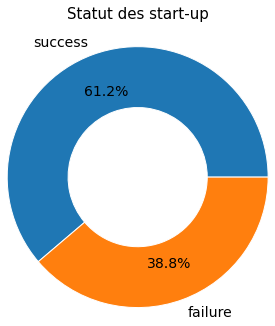

In [42]:
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(df_avec_outliers["status"].value_counts().values, radius = 1.5, labels = df_avec_outliers["status"].value_counts().index, 
        autopct='%1.1f%%', wedgeprops=dict(width=0.7, edgecolor='w'), startangle=0, pctdistance=0.7,  textprops={'fontsize': 14})
plt.title('Statut des start-up',pad=50, fontsize = 15)
plt.show()

No handles with labels found to put in legend.


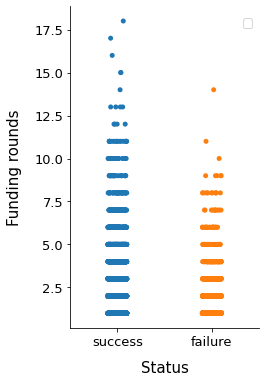

In [43]:
sns.catplot(y ='funding_rounds', x= "status", data = df_avec_outliers, aspect=1/1.5)
plt.xticks(fontsize = 13, rotation = 0)
plt.yticks(fontsize = 13, rotation = 0)
plt.xlabel("Status",labelpad = 12, fontsize = 15)
plt.ylabel("Funding rounds",labelpad = 12, fontsize = 15)
plt.legend(bbox_to_anchor = (0.85, 1), loc = 2, borderaxespad=1, fontsize= 12)
plt.show()

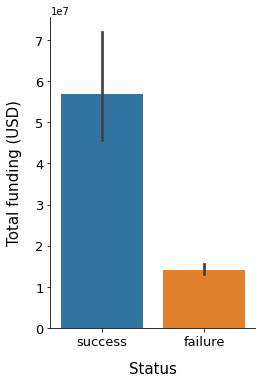

In [44]:
sns.catplot(data= df_avec_outliers, x='status', y = "funding_total_usd", kind="bar", aspect=1/1.5)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Status",labelpad = 13, fontsize = 15)
plt.ylabel("Total funding (USD)",labelpad = 13, fontsize = 15)
plt.show()

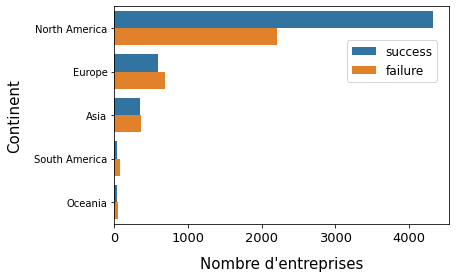

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(y ='Continent_Name', data=df_avec_outliers, order=df_avec_outliers['Continent_Name'].value_counts().iloc[:5].index, 
                hue = df_avec_outliers["status"])
plt.xticks(fontsize = 13, rotation = 0)
plt.xlabel("Nombre d'entreprises",labelpad = 12, fontsize = 15)
plt.ylabel("Continent",labelpad = 12, fontsize = 15)
plt.legend(bbox_to_anchor = (1, 0.9), borderaxespad=1, fontsize= 12)
plt.draw()

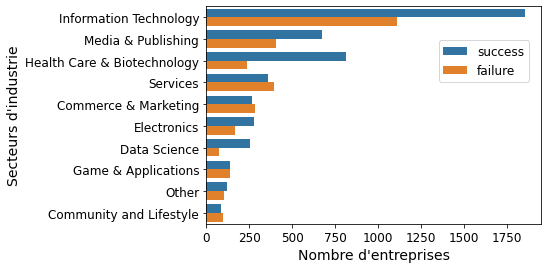

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(y=df_avec_outliers["Industry_Group"], order = df_avec_outliers['Industry_Group'].value_counts().head(10).index, 
                hue = df_avec_outliers["status"])
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Nombre d'entreprises", fontsize = 14)
plt.ylabel("Secteurs d'industrie", fontsize = 14)
plt.legend(bbox_to_anchor = (1, 0.9), borderaxespad=1, fontsize= 12)
plt.draw()

(-10000000.0, 100000000.0)

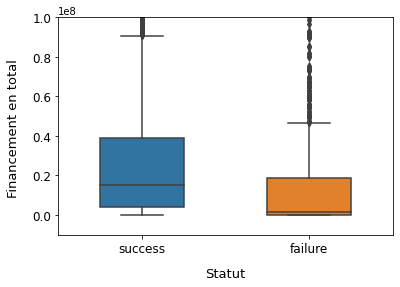

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_sans_outliers, x="status", y = "funding_total_usd", width= 0.5)
#sns.stripplot(data= df4, x="status", y = "funding_total_usd", size = 10, palette="dark")
#plt.title("Funding total", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Statut",labelpad = 12, fontsize = 13)
plt.ylabel("Financement en total ",labelpad = 12, fontsize = 13)
plt.ylim(-1e7, 1e8)

(-500.0, 6000.0)

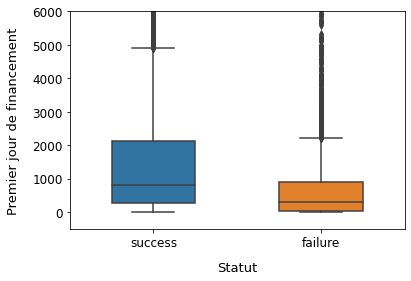

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_sans_outliers, x="status", y = "funding_day", width= 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Statut",labelpad = 12, fontsize = 13)
plt.ylabel("Premier jour de financement",labelpad = 12, fontsize = 13)
plt.ylim(-500, 6000)

(0.0, 7.0)

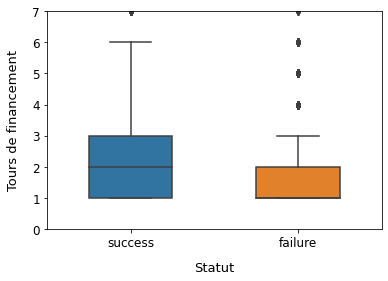

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_sans_outliers, x="status", y = "funding_rounds", width= 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Statut",labelpad = 12, fontsize = 13)
plt.ylabel("Tours de financement",labelpad = 12, fontsize = 13)
plt.ylim(0, 7)

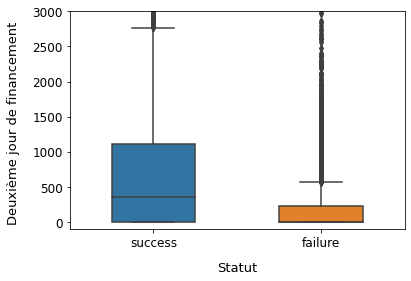

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_sans_outliers, x="status", y = "funding_range_1_2", width= 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Statut",labelpad = 12, fontsize = 13)
plt.ylabel("Deuxième jour de financement ",labelpad = 12, fontsize = 13)
plt.ylim(-100, 3000)
plt.show()


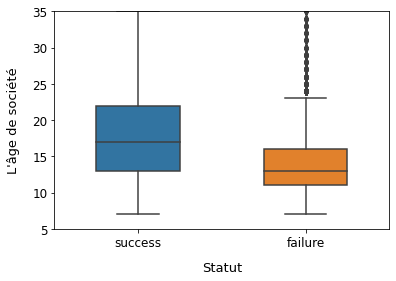

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_sans_outliers, x="status", y = "company_age", width= 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Statut",labelpad = 12, fontsize = 13)
plt.ylabel("L'âge de société",labelpad = 12, fontsize = 13)
plt.ylim(5, 35)
plt.show()


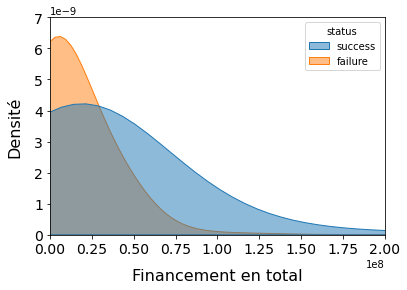

In [52]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_sans_outliers, x="funding_total_usd", hue="status", fill=True, common_norm=True, alpha=.5, 
            linewidth=1, bw_adjust=3.8)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Financement en total",labelpad = 12, fontsize = 16)
plt.ylabel("Densité",labelpad = 12, fontsize = 16)
plt.xlim(0, 2e8)
plt.ylim(0, 7e-9)
plt.show()

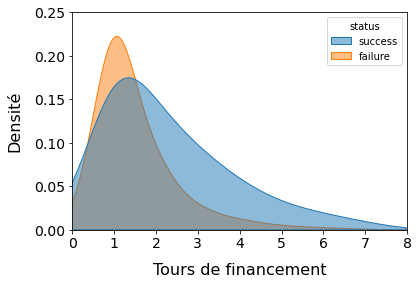

In [53]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_sans_outliers, x="funding_rounds", hue="status", fill=True, common_norm=True, 
            alpha=.5, linewidth=1, bw_adjust=2.7)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Tours de financement",labelpad = 12, fontsize = 16)
plt.ylabel("Densité",labelpad = 12, fontsize = 16)
plt.xlim(0, 8)
plt.ylim(0, 0.25)
plt.show()

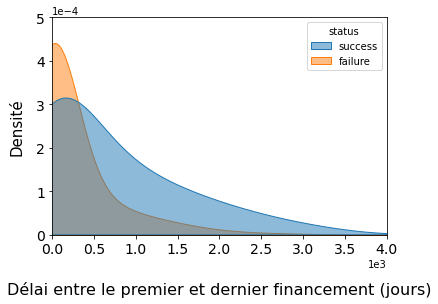

In [54]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_sans_outliers, x="funding_range_1_2", hue="status", fill=True, common_norm=True, 
            alpha=.5, linewidth=1, bw_adjust=3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Délai entre le premier et dernier financement (jours)",labelpad = 25, fontsize = 16)
plt.ylabel("Densité",labelpad = 12, fontsize = 15)
plt.xlim(0, 4000)
plt.ylim(0, 0.0005)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.show()

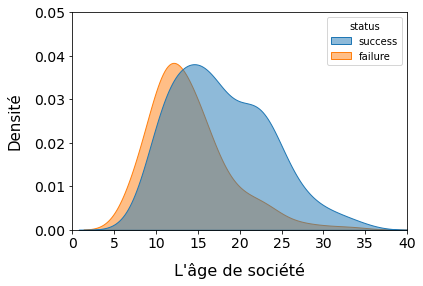

In [55]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_sans_outliers, x="company_age", hue="status", fill=True, common_norm=True, 
            alpha=.5, linewidth=1, bw_adjust=2)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("L'âge de société",labelpad = 12, fontsize = 16)
plt.ylabel("Densité",labelpad = 12, fontsize = 15)
plt.xlim(0, 40)
plt.ylim(0, 0.05)
plt.show()

# Machine Learning

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import plot_precision_recall_curve, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.feature_selection import chi2

# Tous ML avec seulement les variables numériques.

In [57]:
df4 = pd.read_csv("data_ML_avec_outliers.csv").drop('Unnamed: 0', axis = 'columns')
df4 = df4.dropna()
df4.head(5)

,name,funding_total_usd,status,funding_rounds,Industry_Group,funding_day,funding_range_1_2,company_age,Continent_Name
0,1 Mainstream,5000000.0,success,1,Information Technology,1111.0,0.0,10,North America
1,1000 Markets,500000.0,success,1,Media & Publishing,134.0,0.0,13,North America
2,1000memories,2535000.0,success,2,Information Technology,0.0,411.0,12,North America
3,100Plus,1250000.0,success,2,Data Science,47.0,28.0,11,North America
4,1010data,35000000.0,success,1,Information Technology,3719.0,0.0,22,North America


In [58]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 8705
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8703 non-null   object 
 1   funding_total_usd  8703 non-null   float64
 2   status             8703 non-null   object 
 3   funding_rounds     8703 non-null   int64  
 4   Industry_Group     8703 non-null   object 
 5   funding_day        8703 non-null   float64
 6   funding_range_1_2  8703 non-null   float64
 7   company_age        8703 non-null   int64  
 8   Continent_Name     8703 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 679.9+ KB


In [59]:
df4["status"].value_counts()

success    5329
failure    3374
Name: status, dtype: int64

In [60]:
X = df4[["funding_total_usd", "funding_rounds","company_age", "funding_day", "funding_range_1_2"]]
y = df4["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Encode label
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

In [61]:
classifiers = []
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=40)
dtc = DecisionTreeClassifier()
svm = SVC(kernel='rbf', class_weight='balanced')
xgb = XGBClassifier(n_estimators=1, max_depth=3)
abc = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
bag = BaggingClassifier(RandomForestClassifier(),n_estimators=40, random_state=0)
knn = KNeighborsClassifier()
nb = GaussianNB()


classifiers.append(lr)
classifiers.append(rfc)
classifiers.append(dtc)
classifiers.append(svm)
classifiers.append(xgb)
classifiers.append(abc)
classifiers.append(gbc)
classifiers.append(bag)
classifiers.append(knn)
classifiers.append(nb)

In [62]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, cv=10 ,scoring= "accuracy"))

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:39:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be r

In [63]:
results = pd.DataFrame({"Algorithm": ["Logistic Regression", "Random Forest", "Decision Tree", "Support Vector Machines",
                        "XGBoost", "Ada Boost", "Gradient Boosting","Bagging Classifier", "KNeighbors", "GaussianNB"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False).style.background_gradient(cmap='Blues', subset=['Accuracy_mean'])
results

,Algorithm,Accuracy_mean,Std
6,Gradient Boosting,0.743464,0.014579
7,Bagging Classifier,0.734272,0.013586
5,Ada Boost,0.729962,0.014253
4,XGBoost,0.727095,0.016223
1,Random Forest,0.723931,0.014132
0,Logistic Regression,0.721488,0.016640
3,Support Vector Machines,0.710287,0.015862
8,KNeighbors,0.700086,0.015539
2,Decision Tree,0.658288,0.014724
9,GaussianNB,0.539646,0.015051


## Gradient Boosting

In [71]:
df4 = pd.read_csv("data_ML_avec_outliers.csv").drop('Unnamed: 0', axis = 'columns')
df4 = df4.dropna()

X = df4[["funding_total_usd", "funding_rounds","company_age", "funding_day", "funding_range_1_2"]]
y = df4["status"]
z = df4["name"]

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size = 0.2, random_state=0, stratify=y)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Encode label
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

params = {"n_estimators": 100, "learning_rate": 0.05}

gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100)
gbc.fit(X_train, y_train)
print('train score: {:.3f} | test score: {:.3f}'.format(gbc.score(X_train,y_train),gbc.score(X_test,y_test)))

train score: 0.754 | test score: 0.747


In [72]:
n_estimators = params["n_estimators"]
n_estimators

100

In [73]:
scores_gbc = cross_val_score(gbc, X_train, y_train, cv=10)
print('The cross-validated accuracy score is : {:.3f}'.format(scores_gbc.mean()))
print('The standard deviation is : {:.3f}'.format(scores_gbc.std()))

The cross-validated accuracy score is : 0.746
The standard deviation is : 0.013


In [74]:
y_train_pred_gbc = gbc.predict(X_train)
y_test_pred_gbc = gbc.predict(X_test)

In [75]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-oob-py
def heldout_score(gbc, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``."""
    test_score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbc.staged_decision_function(X_test)):
        test_score[i] = gbc.loss_(y_test, y_pred)
    return test_score

test_score = heldout_score(gbc, X_test, y_test)
test_score

array([1.31234943, 1.29165801, 1.27273257, 1.25551758, 1.24047584,
       1.22634537, 1.21317421, 1.20116169, 1.19011929, 1.17999885,
       1.17058814, 1.16236595, 1.15440393, 1.14712738, 1.14002125,
       1.13356233, 1.12762183, 1.12224715, 1.11689343, 1.11186154,
       1.10727836, 1.10291119, 1.09889654, 1.09489747, 1.09144815,
       1.08777921, 1.08517948, 1.08208483, 1.07950769, 1.07694699,
       1.07449623, 1.07221327, 1.07016516, 1.0681394 , 1.06639552,
       1.0645001 , 1.06301797, 1.0616844 , 1.06024004, 1.05898709,
       1.05780827, 1.05660535, 1.05518342, 1.0538715 , 1.05288633,
       1.05175543, 1.05085142, 1.05051953, 1.04950172, 1.04864365,
       1.04802701, 1.04719446, 1.04654616, 1.04595035, 1.04519006,
       1.04487893, 1.04416344, 1.04346319, 1.04352509, 1.04308768,
       1.0426716 , 1.04205027, 1.0420882 , 1.04171069, 1.04126796,
       1.04102583, 1.04075586, 1.04056598, 1.04053912, 1.03976398,
       1.03938709, 1.03941166, 1.03894637, 1.03873602, 1.03892

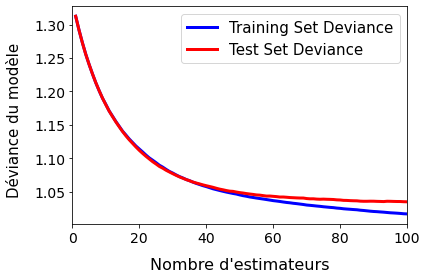

In [84]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(n_estimators) + 1, gbc.train_score_, lw=3, label="Training Set Deviance", color='b')
plt.plot(np.arange(n_estimators) + 1, test_score, "r-", lw=3, label="Test Set Deviance", color='r')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Nombre d'estimateurs",labelpad = 12, fontsize = 16)
plt.ylabel("Déviance du modèle  ",labelpad = 12, fontsize = 15)
plt.xlim(0, 100)
#plt.ylim(1, 1.35)
plt.legend(loc="upper right", fontsize = 15)
plt.show()

In [85]:
np.arange(n_estimators)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [86]:
from joblib import dump,load
dump(gbc, 'mymodel.joblib') 

['mymodel.joblib']

In [87]:
dump(sc_x, 'myscaler.joblib') 

['myscaler.joblib']

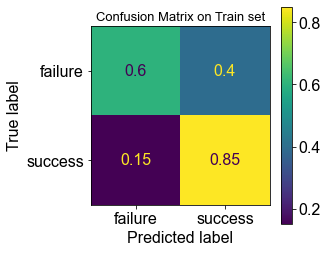

In [89]:
_ , ax = plt.subplots(figsize=(4,4))
ax.set_title("Confusion Matrix on Train set", fontdict={'fontsize': 13, 'fontweight': 'medium'})
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_gbc, ax=ax, normalize = 'true',
                                        display_labels=labelencoder.inverse_transform(gbc.classes_))
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 16}
plt.rc('font', **font)
plt.show()

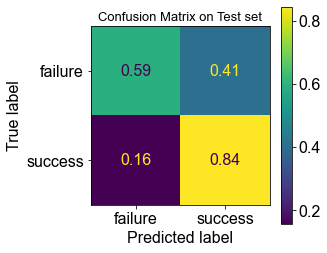

In [90]:
_ , ax = plt.subplots(figsize=(4,4))
ax.set_title("Confusion Matrix on Test set", fontdict={'fontsize': 13, 'fontweight': 'medium'})
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gbc, ax=ax, normalize = 'true',
                                        display_labels=labelencoder.inverse_transform(gbc.classes_))
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 18}
plt.rc('font', **font)
plt.show()

In [91]:
print(classification_report(y_train, y_train_pred_gbc,  target_names=labelencoder.inverse_transform(gbc.classes_)))

              precision    recall  f1-score   support

     failure       0.72      0.60      0.65      2699
     success       0.77      0.85      0.81      4263

    accuracy                           0.75      6962
   macro avg       0.74      0.73      0.73      6962
weighted avg       0.75      0.75      0.75      6962



In [92]:
train_rep=classification_report(y_train, y_train_pred_gbc, output_dict=True,
                                target_names=labelencoder.inverse_transform(gbc.classes_))

train_df=round(pd.DataFrame(train_rep).transpose(), 2)
train_df.head()

,precision,recall,f1-score,support
failure,0.72,0.60,0.65,2699.00
success,0.77,0.85,0.81,4263.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.74,0.73,0.73,6962.00
weighted avg,0.75,0.75,0.75,6962.00


In [93]:
feature_importance = pd.DataFrame({"features": X.columns, 
                                   "score": gbc.feature_importances_}).sort_values(by="score", ascending=False)

feature_importance['features'] = feature_importance['features'].replace({
                                                            'funding_total_usd': 'Funding total (USD)',  
                                                            'company_age': 'Company age', 
                                                            'funding_range_1_2': 'Time between first-last funding', 
                                                            'funding_rounds': 'Funding rounds',
                                                            'funding_day': 'Time to get first funding'})

feature_importance["percentage"]= (feature_importance["score"]/feature_importance["score"].sum())*100
feature_importance    

,features,score,percentage
0,Funding total (USD),0.603176,60.317605
2,Company age,0.178304,17.830445
4,Time between first-last funding,0.112706,11.270610
1,Funding rounds,0.059564,5.956356
3,Time to get first funding,0.046250,4.624985


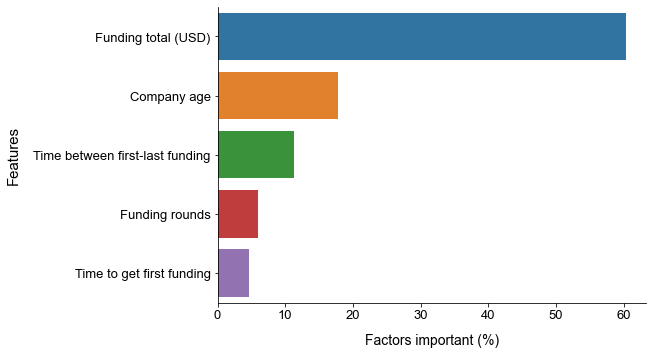

In [94]:
sns.catplot(y ='features', x='percentage',data=feature_importance, kind="bar", aspect=1/0.5)
plt.xticks(fontsize = 13, rotation = 0)
plt.yticks(fontsize = 13, rotation = 0)
plt.xlabel("Factors important (%)",labelpad = 12, fontsize = 14)
plt.ylabel("Features",labelpad = 12, fontsize = 15)
plt.show()

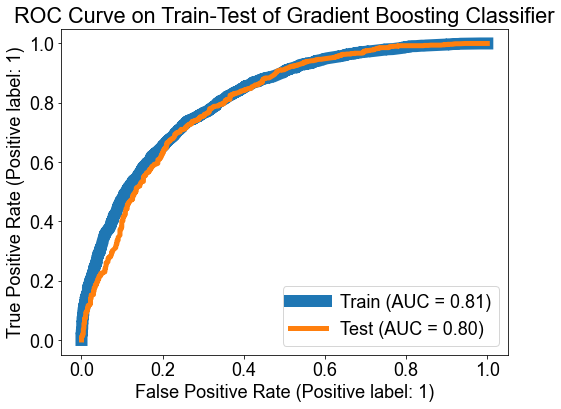

In [95]:
# Visualize ROC curves
_ , ax = plt.subplots(figsize = (8,6)) # Get subplot from matplotlib
ax.set(title="ROC Curve on Train-Test of Gradient Boosting Classifier") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gbc, X_train, y_train, ax=ax, lw=12, name="Train") # RocCurveDisplay from sklearn
RocCurveDisplay.from_estimator(gbc, X_test, y_test, ax=ax, lw=5, name="Test") # RocCurveDisplay from sklearn
plt.show()

In [96]:
y_test_prob_gbc = gbc.predict_proba(X_test)
y_train_prob_gbc = gbc.predict_proba(X_train)

In [97]:
z_train = z_train.reset_index()
z_train.head()

,index,name
0,3491,Motionbox
1,6962,SupportSpace
2,6902,Kyma Medical Technologies
3,3156,LVL7 Systems
4,1725,Empowered Careers


In [98]:
df8 = pd.DataFrame(sc_x.inverse_transform(X_train), columns = ["funding_total_usd", "funding_rounds","company_age", "funding_day", "funding_range_1_2"])
df8["proba"] = gbc.predict_proba(X_train)[:,1]
df8["status"] = labelencoder.inverse_transform(y_train).tolist()
df8["prediction"] = labelencoder.inverse_transform(y_train_pred_gbc).tolist()
df8["difference"] = np.where(df8["status"] == df8["prediction"], True, False)
df8.head(5)

,funding_total_usd,funding_rounds,company_age,funding_day,funding_range_1_2,proba,status,prediction,difference
0,17200000.0,3.0,16.0,243.0,866.0,0.817372,success,success,True
1,36250000.0,4.0,16.0,53.0,1725.0,0.828668,failure,success,False
2,10000000.0,1.0,14.0,2106.0,0.0,0.553158,success,success,True
3,49300000.0,3.0,23.0,1364.0,868.0,0.844144,success,success,True
4,19391496.0,2.0,11.0,22.0,743.0,0.737639,success,success,True


In [99]:
df8["difference"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

True     75.4%
False    24.6%
Name: difference, dtype: object

In [100]:
df9 = pd.concat([df8, z_train], axis=1)
del df9['index']
df9.head(10)

,funding_total_usd,funding_rounds,company_age,funding_day,funding_range_1_2,proba,status,prediction,difference,name
0,17200000.0,3.0,16.0,243.0,866.0,0.817372,success,success,True,Motionbox
1,36250000.0,4.0,16.0,53.0,1725.0,0.828668,failure,success,False,SupportSpace
2,10000000.0,1.0,14.0,2106.0,0.0,0.553158,success,success,True,Kyma Medical Technologies
3,49300000.0,3.0,23.0,1364.0,868.0,0.844144,success,success,True,LVL7 Systems
4,19391496.0,2.0,11.0,22.0,743.0,0.737639,success,success,True,Empowered Careers
5,2000000.0,2.0,12.0,455.0,1059.0,0.646583,failure,success,False,Hopscotch
6,50000000.0,1.0,17.0,2658.0,0.0,0.663142,failure,success,False,Sotmarket
7,7000000.0,1.0,21.0,1506.0,0.0,0.795676,success,success,True,Similarity Systems
8,650000.0,1.0,22.0,0.0,0.0,0.354919,failure,failure,True,"Sidustar International, Inc."
9,28100000.0,3.0,16.0,546.0,1324.0,0.817372,success,success,True,Cooliris


In [101]:
df9.to_csv("prediction_train_data_gbc.csv")

In [102]:
df8 = pd.DataFrame(sc_x.inverse_transform(X_test), columns = ["funding_total_usd", "funding_rounds","company_age", "funding_day", "funding_range_1_2"])
df8["proba"] = gbc.predict_proba(X_test)[:,1]
df8["status"] = labelencoder.inverse_transform(y_test).tolist()
df8["prediction"] = labelencoder.inverse_transform(y_test_pred_gbc).tolist()
df8["difference"] = np.where(df8["status"] == df8["prediction"], True, False)
df8.head(5)

,funding_total_usd,funding_rounds,company_age,funding_day,funding_range_1_2,proba,status,prediction,difference
0,38730470.0,1.0,10.0,0.0,0.0,0.342297,failure,failure,True
1,7998800.0,2.0,23.0,2496.0,1477.0,0.832454,success,success,True
2,38730470.0,2.0,14.0,823.0,210.0,0.649106,success,success,True
3,2150000.0,3.0,13.0,617.0,682.0,0.695926,success,success,True
4,500000.0,1.0,12.0,0.0,0.0,0.218807,failure,failure,True


In [103]:
df8["difference"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

True     74.7%
False    25.3%
Name: difference, dtype: object

In [104]:
z_test = z_test.reset_index()
z_test.head()

,index,name
0,1967,Fliggo
1,4156,Planet Payment
2,6704,Jigsee
3,936,CalmSea
4,4731,Second Half Playbook


In [105]:
df9 = pd.concat([df8, z_test], axis=1)
del df9['index']
df9.head(10)

,funding_total_usd,funding_rounds,company_age,funding_day,funding_range_1_2,proba,status,prediction,difference,name
0,38730470.0,1.0,10.0,0.0,0.0,0.342297,failure,failure,True,Fliggo
1,7998800.0,2.0,23.0,2496.0,1477.0,0.832454,success,success,True,Planet Payment
2,38730470.0,2.0,14.0,823.0,210.0,0.649106,success,success,True,Jigsee
3,2150000.0,3.0,13.0,617.0,682.0,0.695926,success,success,True,CalmSea
4,500000.0,1.0,12.0,0.0,0.0,0.218807,failure,failure,True,Second Half Playbook
5,905000.0,1.0,13.0,397.0,0.0,0.370012,failure,failure,True,DwellGreen
6,12050000.0,2.0,18.0,442.0,835.0,0.725627,failure,success,False,Transparency Software
7,23084124.0,4.0,17.0,30.0,1818.0,0.872798,success,success,True,Qype
8,33000000.0,4.0,22.0,305.0,2464.0,0.905423,success,success,True,Compete
9,43179.0,1.0,15.0,63.0,0.0,0.154654,failure,failure,True,YourTeamOnline


In [106]:
df9.to_csv("prediction_test_data_gbc.csv")

In [107]:
df4['Industry_Group'] = labelencoder.fit_transform(df4['Industry_Group'] )
df4["status"] = labelencoder.fit_transform(df4["status"])
df4['Continent_Name'] = labelencoder.fit_transform(df4['Continent_Name'])
df4['Industry_Group'] = labelencoder.fit_transform(df4['Industry_Group'])

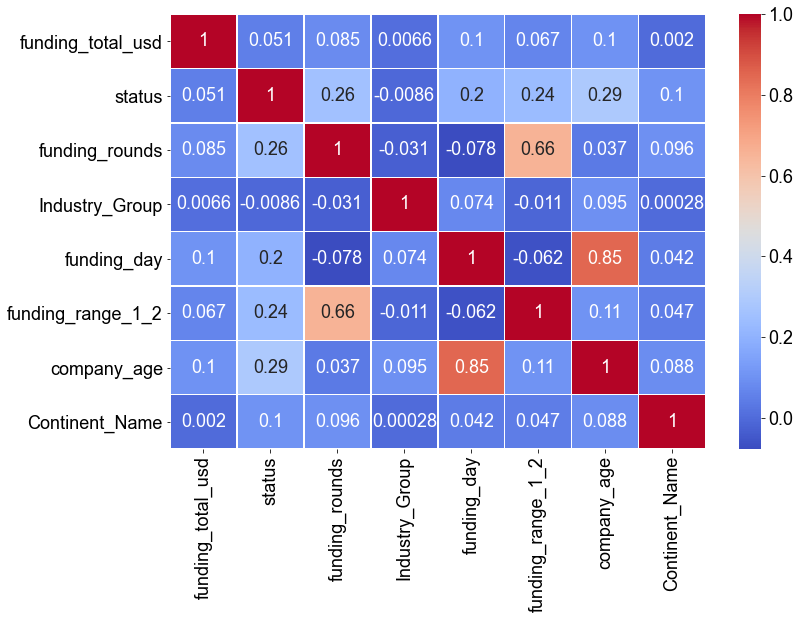

In [108]:
plt.figure(figsize = (12,8))
sns.heatmap(df4.corr(),cmap='coolwarm',annot=True,linewidths=.5)
plt.show()